In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sdf = pd.read_excel(r"C:\Users\dougl\DA12\Capstone\capstonedata1.xlsx")

In [3]:
sdf.head(1)

,Full Name,Contestant,Survivor Score,Survival Average,Challenge Wins,Challenge Appearances,Challenge Win %,Challenge Sit Outs,Votes For Bootee,Votes Against The Player,...,Jury Votes %,Season #,Season Title,Year Aired,Age,Hometown,Home State,Profession,Finish #,Gender
0,Kelly Wiglesworth,Kelly,1.34,12.26,5.87,16.1,0.36,2,6,0,...,0.43,1,Borneo,2000,24,"Los Angeles, CA",CA,River Rafting Guide,Runner-Up,Female


In [4]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Full Name                    839 non-null    object 
 1   Contestant                   839 non-null    object 
 2   Survivor Score               839 non-null    float64
 3   Survival Average             839 non-null    float64
 4   Challenge Wins               839 non-null    float64
 5   Challenge Appearances        839 non-null    float64
 6   Challenge Win %              839 non-null    float64
 7   Challenge Sit Outs           839 non-null    object 
 8   Votes For Bootee             839 non-null    object 
 9   Votes Against The Player     839 non-null    object 
 10  Total Votes Cast             839 non-null    object 
 11  Tribal Council  Appearances  839 non-null    object 
 12  Tribal Council %             839 non-null    object 
 13  Weight Tribal Counci

In [5]:
cleanup = [
    'Challenge Sit Outs', 'Votes For Bootee', 'Votes Against The Player', 'Total Votes Cast',
    'Tribal Council  Appearances', 'Tribal Council %', 'Weight Tribal Council Ratio', 
    'Jury Votes For', 'Total Jurors', 'Jury Votes %'
]

In [6]:
for cols in cleanup:
 
    sdf[cols] = pd.to_numeric(sdf[cols], errors='coerce')

In [7]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Full Name                    839 non-null    object 
 1   Contestant                   839 non-null    object 
 2   Survivor Score               839 non-null    float64
 3   Survival Average             839 non-null    float64
 4   Challenge Wins               839 non-null    float64
 5   Challenge Appearances        839 non-null    float64
 6   Challenge Win %              839 non-null    float64
 7   Challenge Sit Outs           712 non-null    float64
 8   Votes For Bootee             835 non-null    float64
 9   Votes Against The Player     808 non-null    float64
 10  Total Votes Cast             809 non-null    float64
 11  Tribal Council  Appearances  809 non-null    float64
 12  Tribal Council %             836 non-null    float64
 13  Weight Tribal Counci

In [8]:
sdf = sdf.drop(columns=['Contestant'])

In [9]:
sdf.head(7)

,Full Name,Survivor Score,Survival Average,Challenge Wins,Challenge Appearances,Challenge Win %,Challenge Sit Outs,Votes For Bootee,Votes Against The Player,Total Votes Cast,...,Jury Votes %,Season #,Season Title,Year Aired,Age,Hometown,Home State,Profession,Finish #,Gender
0,Kelly Wiglesworth,1.34,12.26,5.87,16.10,0.36,2.0,6.0,0.0,71.0,...,0.43,1,Borneo,2000,24,"Los Angeles, CA",CA,River Rafting Guide,Runner-Up,Female
1,Richard Hatch,1.58,7.82,1.87,16.10,0.12,0.0,9.0,6.0,70.0,...,0.57,1,Borneo,2000,39,"Providence, RI",RI,Corporate Trainer,Winner,Male
2,Rudy Boesch,1.09,3.95,1.62,15.10,0.11,3.0,10.0,8.0,71.0,...,NaN,1,Borneo,2000,72,"Virginia Beach, VA",VA,Retired Navy SEAL,3rd,Male
3,Gretchen Cordy,1.12,3.85,1.23,3.07,0.40,0.0,3.0,4.0,31.0,...,NaN,1,Borneo,2000,38,"Clarksville, TN",TN,Teacher,10th,Female
4,Sue Hawk,0.95,3.67,0.87,15.10,0.06,0.0,9.0,5.0,70.0,...,NaN,1,Borneo,2000,38,"Palmyra, WI",WI,Truck Driver,4th,Female
5,Colleen Haskell,0.57,3.51,2.56,12.07,0.21,3.0,3.0,7.0,61.0,...,NaN,1,Borneo,2000,24,"Miami, FL",FL,Student,6th,Female
6,Sean Kenniff,0.78,3.30,1.87,14.10,0.13,0.0,6.0,9.0,66.0,...,NaN,1,Borneo,2000,30,"Long Island, NY",NY,Neurologist,5th,Male


In [10]:
def cleanfinish(finish):
    if 'Winner' in finish:
        return 1
    elif 'Runner-Up' in finish:
        return 2
    else:
       
        import re
        match = re.search(r'\d+', finish)
        if match:
            return int(match.group())
        return None

sdf['Finish #'] = sdf['Finish #'].apply(cleanfinish)

In [11]:
sdf.head(1)

,Full Name,Survivor Score,Survival Average,Challenge Wins,Challenge Appearances,Challenge Win %,Challenge Sit Outs,Votes For Bootee,Votes Against The Player,Total Votes Cast,...,Jury Votes %,Season #,Season Title,Year Aired,Age,Hometown,Home State,Profession,Finish #,Gender
0,Kelly Wiglesworth,1.34,12.26,5.87,16.1,0.36,2.0,6.0,0.0,71.0,...,0.43,1,Borneo,2000,24,"Los Angeles, CA",CA,River Rafting Guide,2.0,Female


In [12]:
aggregations = {
    'Survivor Score': 'mean',
    'Survival Average': 'mean',
    'Challenge Wins': 'sum',
    'Challenge Appearances': 'sum',
    'Challenge Win %': 'mean',
    'Challenge Sit Outs': 'sum',
    'Votes For Bootee': 'sum',
    'Votes Against The Player': 'sum',
    'Total Votes Cast': 'sum',
    'Tribal Council  Appearances': 'sum',
    'Tribal Council %': 'mean',
    'Weight Tribal Council Ratio': 'mean',
    'Jury Votes For': 'sum',
    'Total Jurors': 'sum',
    'Jury Votes %': 'mean',
    'Season #': 'first',
    'Season Title': 'first',
    'Year Aired': 'first',
    'Age': 'first',
    'Hometown': 'first',
    'Home State': 'first',
    'Profession': 'first',
    'Finish #': 'first',
    'Gender': 'first'
}



In [13]:
sdf = sdf.groupby('Full Name').agg(aggregations).reset_index()

In [14]:
sdf.info()
sdf.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Full Name                    705 non-null    object 
 1   Survivor Score               705 non-null    float64
 2   Survival Average             705 non-null    float64
 3   Challenge Wins               705 non-null    float64
 4   Challenge Appearances        705 non-null    float64
 5   Challenge Win %              705 non-null    float64
 6   Challenge Sit Outs           705 non-null    float64
 7   Votes For Bootee             705 non-null    float64
 8   Votes Against The Player     705 non-null    float64
 9   Total Votes Cast             705 non-null    float64
 10  Tribal Council  Appearances  705 non-null    float64
 11  Tribal Council %             702 non-null    float64
 12  Weight Tribal Council Ratio  702 non-null    float64
 13  Jury Votes For      

,Full Name,Survivor Score,Survival Average,Challenge Wins,Challenge Appearances,Challenge Win %,Challenge Sit Outs,Votes For Bootee,Votes Against The Player,Total Votes Cast,...,Jury Votes %,Season #,Season Title,Year Aired,Age,Hometown,Home State,Profession,Finish #,Gender
0,Aaron Meredith,1.18,4.42,2.65,4.29,0.62,0.0,4.0,5.0,63.0,...,NaN,39,Island of the Idols,2019,36,"Warwick, RI",RI,Gym Owner,9.0,Male
1,Aaron Reisberger,0.97,2.77,0.77,1.30,0.59,0.0,1.0,3.0,13.0,...,NaN,15,China,2007,32,"Venice, CA",CA,Surfing Instructor,11.0,Male


In [15]:
sdf.to_excel('cleanedcapstonev2.xlsx', index=True)

In [64]:
most_vap = sdf.loc['Votes Against The Player'].idxmax()
most_vap

KeyError: 'Votes Against The Player'

In [ ]:
sdf.to_csv(r"C:\Users\dougl\DA12\Capstone\Survivor_Capstone_Douglas_Kaplan\data/cleanedcapstone.csv", index=False)

In [17]:
statetoregion = {
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast', 'MA': 'Northeast', 'RI': 'Northeast', 'CT': 'Northeast',
    'NY': 'Northeast', 'NJ': 'Northeast', 'PA': 'Northeast',
    'OH': 'Midwest', 'MI': 'Midwest', 'IN': 'Midwest', 'IL': 'Midwest', 'WI': 'Midwest', 'MN': 'Midwest', 
    'IA': 'Midwest', 'MO': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest',
    'DE': 'South', 'MD': 'South', 'VA': 'South', 'WV': 'South', 'KY': 'South', 'TN': 'South', 'NC': 'South', 
    'SC': 'South', 'GA': 'South', 'FL': 'South', 'AL': 'South', 'MS': 'South', 'AR': 'South', 'LA': 'South', 
    'OK': 'South', 'TX': 'South',
    'MT': 'West', 'ID': 'West', 'WY': 'West', 'CO': 'West', 'NM': 'West', 'AZ': 'West', 'UT': 'West', 'NV': 'West', 
    'CA': 'West', 'OR': 'West', 'WA': 'West', 'AK': 'West', 'HI': 'West'
}

In [18]:
sdf['Region'] = sdf['Home State'].map(statetoregion)

In [19]:
rperformance = sdf.groupby('Region').agg({
    'Survivor Score': 'mean',
    'Finish #': 'mean',
    'Challenge Win %': 'mean'
}).reset_index()

In [20]:
rperformance.head(10)

,Region,Survivor Score,Finish #,Challenge Win %
0,Midwest,0.618600,9.743243,0.261603
1,Northeast,0.610180,9.194969,0.247909
2,South,0.662473,9.839806,0.263600
3,West,0.627904,10.032864,0.235437


In [21]:
winners = sdf[sdf['Finish #'] == 1]

In [22]:
winnersbystate = winners['Home State'].value_counts().reset_index()

In [23]:
winnersbystate.columns = ['Home State', 'Number of Winners']

In [24]:
winnersbystate

,Home State,Number of Winners
0,CA,8
1,TX,4
2,NY,4
3,NJ,3
4,MA,3
5,PA,3
6,ON,2
7,UT,1
8,TN,1
9,NC,1


In [25]:
top_3 = sdf[sdf['Finish #'] <= 3]

In [26]:
top_3state = top_3['Home State'].value_counts().reset_index()


In [27]:
top_3state.columns = ['Home State', 'Number of Top 3 Finishers']

In [28]:
top_3state

,Home State,Number of Top 3 Finishers
0,CA,18
1,NY,9
2,TX,8
3,PA,6
4,FL,5
5,MA,4
6,VA,3
7,NJ,3
8,SC,2
9,RI,2


In [29]:
pby_state = sdf['Home State'].value_counts().reset_index()
pby_state.columns = ['Home State', 'Number of Participants']

In [30]:
genderperformance = sdf.groupby('Gender').agg({
    'Survivor Score': 'mean',
    'Finish #': 'mean',
    'Challenge Win %': 'mean',
    'Challenge Wins': 'mean',
    'Votes Against The Player': 'mean'
}).reset_index()

In [31]:
genderperformance

,Gender,Survivor Score,Finish #,Challenge Win %,Challenge Wins,Votes Against The Player
0,Female,0.576539,9.825444,0.231707,1.354448,6.458924
1,Male,0.710298,9.462462,0.268478,1.848892,6.426136


In [32]:
ages = [0, 25, 35, 45, 55, 65, 100]  
labels = ['<25', '25-35', '35-45', '45-55', '55-65', '65+']

In [33]:
sdf['Age Range'] = pd.cut(sdf['Age'], bins=ages, labels=labels, right=False)

In [34]:
agerange_performance = sdf.groupby('Age Range').agg({
    'Survivor Score': 'mean',
    'Finish #': 'mean',
    'Challenge Win %': 'mean',
    'Challenge Wins': 'mean',
    'Votes Against The Player': 'mean'
}).reset_index()

C:\Users\dougl\AppData\Local\Temp\ipykernel_32304\2861248282.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agerange_performance = sdf.groupby('Age Range').agg({


In [35]:
agerange_performance

,Age Range,Survivor Score,Finish #,Challenge Win %,Challenge Wins,Votes Against The Player
0,<25,0.744469,8.689655,0.264704,1.757517,6.798658
1,25-35,0.627108,9.870861,0.260820,1.624448,6.372240
2,35-45,0.674920,9.294574,0.244896,1.547721,6.580882
3,45-55,0.486558,10.728571,0.193442,1.465974,6.116883
4,55-65,0.529783,11.590909,0.226739,1.091739,5.391304
5,65+,0.795000,8.666667,0.253333,1.210000,6.333333


In [36]:
age_performance = sdf.groupby('Age').agg({
    'Survivor Score': 'mean',
    'Finish #': 'mean',
    'Challenge Win %': 'mean',
    'Challenge Wins': 'mean',
    'Votes Against The Player': 'mean'
}).reset_index()

In [37]:
age_performance

,Age,Survivor Score,Finish #,Challenge Win %,Challenge Wins,Votes Against The Player
0,18,0.665000,6.000000,0.145000,1.180000,5.500000
1,19,0.610000,10.000000,0.216250,1.021250,5.750000
2,20,0.925000,8.833333,0.225000,1.321667,6.833333
3,21,0.714912,8.210526,0.249474,2.177895,8.157895
4,22,0.799333,8.965517,0.292333,1.613333,6.900000
5,23,0.714975,8.575758,0.280221,1.811176,5.588235
6,24,0.745867,8.666667,0.260667,1.841000,7.260000
7,25,0.572558,10.780488,0.301628,1.782326,7.790698
8,26,0.767407,8.942857,0.232176,1.703333,4.944444
9,27,0.487403,11.095238,0.263488,1.213256,5.976744


In [38]:
age_performance_sorted = age_performance.sort_values(by='Survivor Score', ascending=False)


In [39]:
age_performance_sorted

,Age,Survivor Score,Finish #,Challenge Win %,Challenge Wins,Votes Against The Player
36,54,1.180000,4.000000,0.615000,5.660000,11.000000
34,52,0.932857,9.000000,0.170000,1.160000,6.714286
2,20,0.925000,8.833333,0.225000,1.321667,6.833333
39,57,0.922500,6.000000,0.320000,3.225000,2.750000
40,58,0.895000,24.000000,0.185000,1.605000,2.000000
48,72,0.862500,5.000000,0.195000,1.750000,5.500000
23,41,0.825769,7.818182,0.248846,2.208462,6.538462
38,56,0.810000,9.666667,0.303333,1.210000,8.666667
18,36,0.805111,8.600000,0.284667,1.704667,7.266667
4,22,0.799333,8.965517,0.292333,1.613333,6.900000


In [40]:
winners_by_age = winners['Age'].value_counts().reset_index()

In [41]:
winners_by_age.columns = ['Age', 'Number of Winners']

In [42]:
winners_by_age_sorted = winners_by_age.sort_values(by='Number of Winners', ascending=False)

In [43]:
winners_by_age_sorted

,Age,Number of Winners
0,24,5
2,34,3
3,39,3
4,26,3
5,36,3
1,21,3
9,25,2
12,33,2
10,41,2
11,30,2


In [44]:
profession_performance = sdf.groupby('Profession').agg({
    'Survivor Score': 'mean',
    'Finish #': 'mean',
    'Challenge Win %': 'mean',
    'Challenge Wins': 'mean',
    'Votes Against The Player': 'mean'
}).reset_index()

In [45]:
profession_performance_sorted = profession_performance.sort_values(by='Survivor Score', ascending=False)

In [46]:
profession_performance_sorted

,Profession,Survivor Score,Finish #,Challenge Win %,Challenge Wins,Votes Against The Player
456,Used Car Salesman,2.13,1.0,0.56,6.18,0.0
291,Oil Driller,2.11,1.0,0.55,7.54,0.0
196,Heart Valve Specialist,1.92,1.0,0.15,1.69,0.0
74,Communications Manager,1.92,1.0,0.20,2.03,2.0
201,Highway Construction,1.86,1.0,0.32,4.82,3.0
...,...,...,...,...,...,...
182,Goat Rancher,-0.90,18.0,0.00,0.00,9.0
243,Maintenance Manager,-1.00,NaN,0.00,0.00,0.0
271,Motorcycle Repair,-1.00,NaN,0.00,0.00,0.0
194,Healthcare Worker,-1.00,42.0,0.00,0.00,0.0


In [47]:
common_professions = sdf['Profession'].value_counts().reset_index()

In [48]:
common_professions.columns = ['Profession', 'Number of Contestants']

In [49]:
common_professions_sorted = common_professions.sort_values(by='Number of Contestants', ascending=False)

In [50]:
common_professions_sorted

,Profession,Number of Contestants
0,Student,16
1,Bartender,15
2,Attorney,14
3,Law Student,14
4,Real Estate Agent,10
...,...,...
220,Residential Builder,1
219,Pilates Trainer,1
218,Photographer,1
217,Highway Repair Worker,1


C:\Users\dougl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


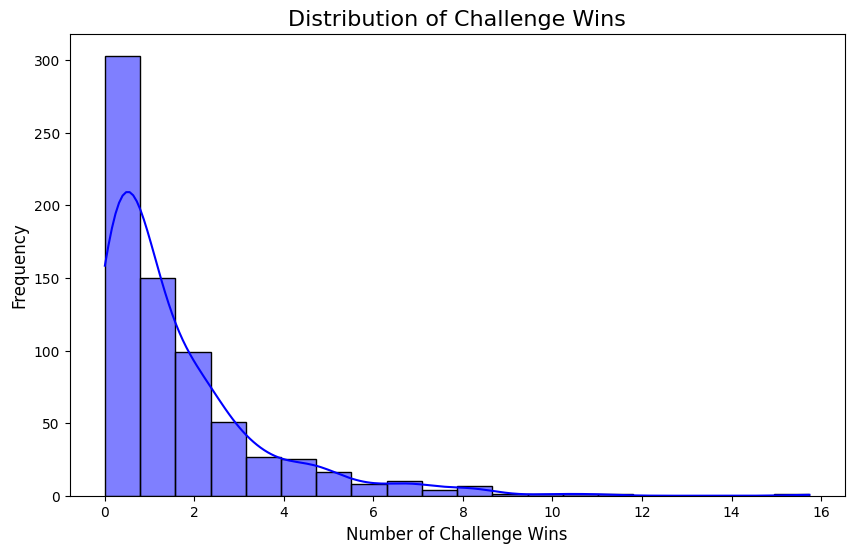

In [51]:
plt.figure(figsize=(10,6))

sns.histplot(sdf['Challenge Wins'], bins=20, kde=True, color='blue')

plt.title('Distribution of Challenge Wins', fontsize=16)
plt.xlabel('Number of Challenge Wins', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

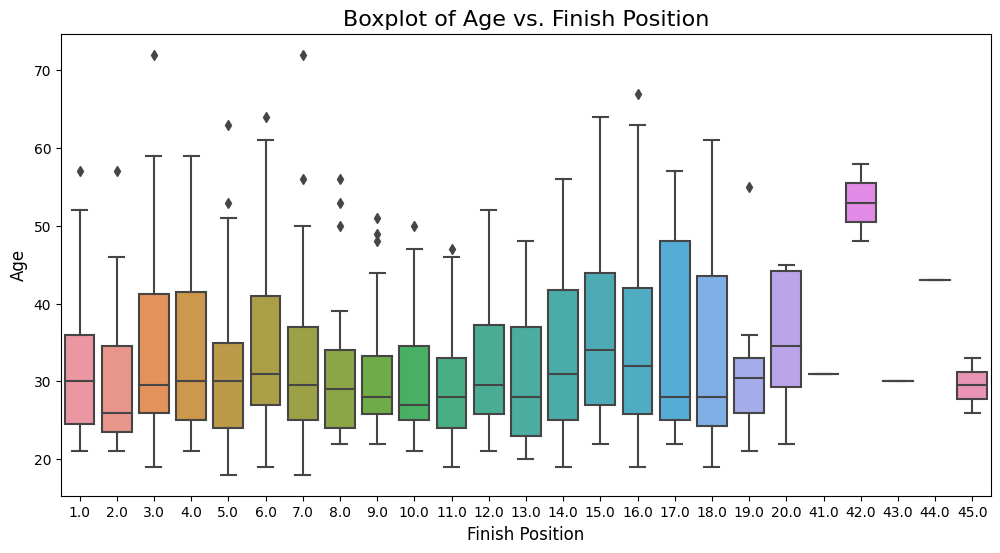

In [52]:
plt.figure(figsize=(12,6))

sns.boxplot(x='Finish #', y='Age', data=sdf)

plt.title('Boxplot of Age vs. Finish Position', fontsize=16)
plt.xlabel('Finish Position', fontsize=12)
plt.ylabel('Age', fontsize=12)

plt.show()

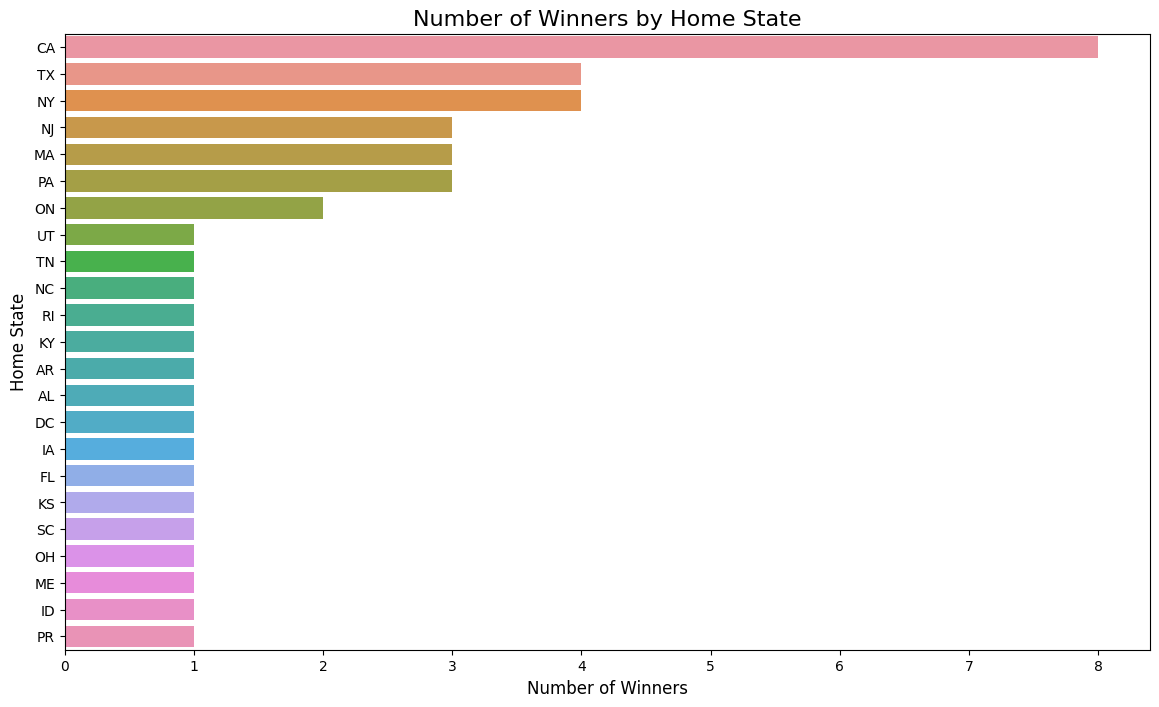

In [54]:
plt.figure(figsize=(14,8))

winners = sdf[sdf['Finish #'] == 1]


sns.countplot(y='Home State', data=winners, order=winners['Home State'].value_counts().index)


plt.title('Number of Winners by Home State', fontsize=16)
plt.xlabel('Number of Winners', fontsize=12)
plt.ylabel('Home State', fontsize=12)


plt.show()

In [55]:
plt.figure(figsize=(10,8))

corr_matrix = sdf.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix of Numeric Features', fontsize=16)

plt.show()

ValueError: could not convert string to float: 'Island of the Idols'

<Figure size 1000x800 with 0 Axes>

C:\Users\dougl\AppData\Local\Temp\ipykernel_32304\3891071738.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sdf[sdf['Finish #'] == 1]['Age'], label='Winners', shade=True)
C:\Users\dougl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dougl\AppData\Local\Temp\ipykernel_32304\3891071738.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sdf[sdf['Finish #'] != 1]['Age'], label='Non-Winners', shade=True)
C:\Users\dougl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

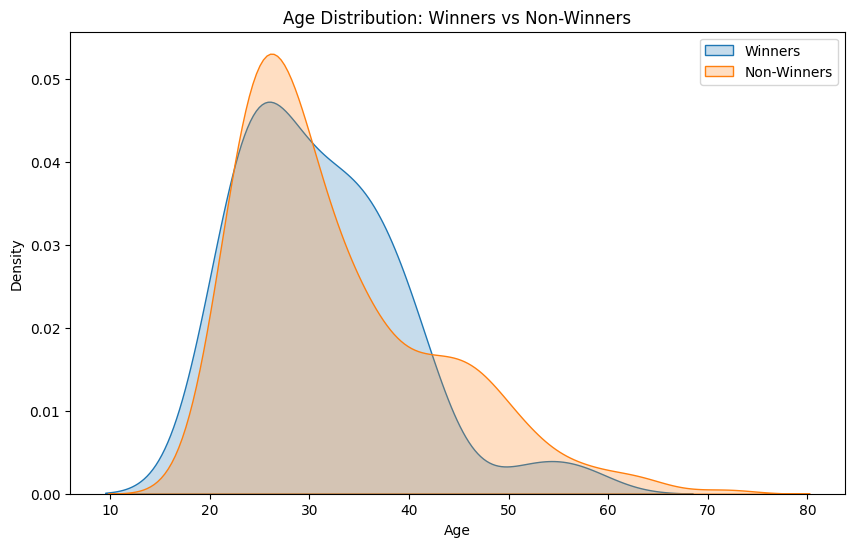

In [56]:
plt.figure(figsize=(10,6))


sns.kdeplot(sdf[sdf['Finish #'] == 1]['Age'], label='Winners', shade=True)
sns.kdeplot(sdf[sdf['Finish #'] != 1]['Age'], label='Non-Winners', shade=True)

plt.title('Age Distribution: Winners vs Non-Winners')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

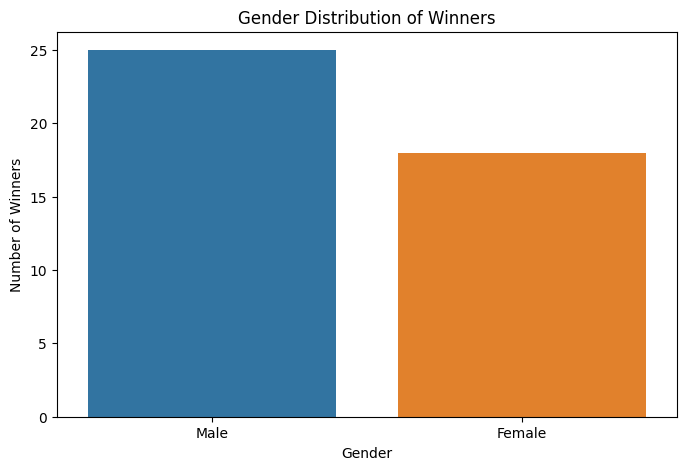

In [57]:
plt.figure(figsize=(8,5))


sns.countplot(x='Gender', data=winners)

plt.title('Gender Distribution of Winners')
plt.xlabel('Gender')
plt.ylabel('Number of Winners')
plt.show()

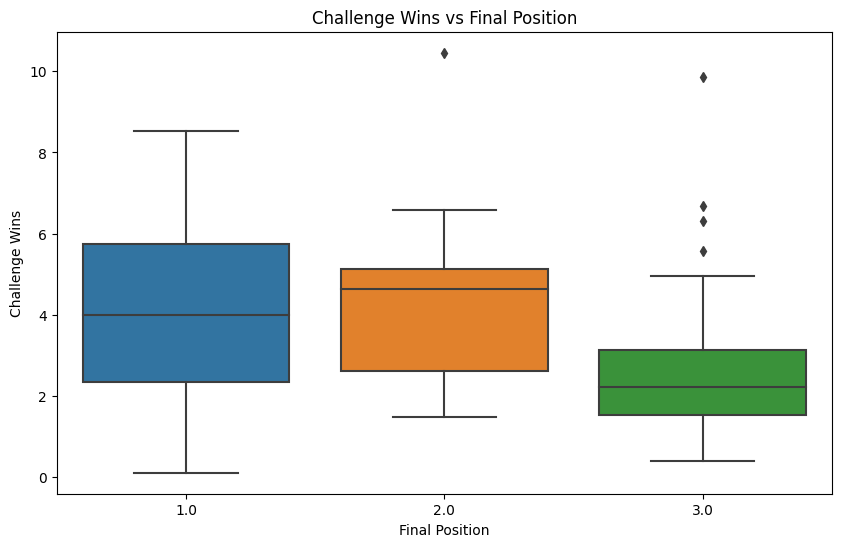

In [58]:
plt.figure(figsize=(10,6))

sns.boxplot(x='Finish #', y='Challenge Wins', data=sdf[sdf['Finish #'] <= 3])

plt.title('Challenge Wins vs Final Position')
plt.xlabel('Final Position')
plt.ylabel('Challenge Wins')
plt.show()

C:\Users\dougl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dougl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


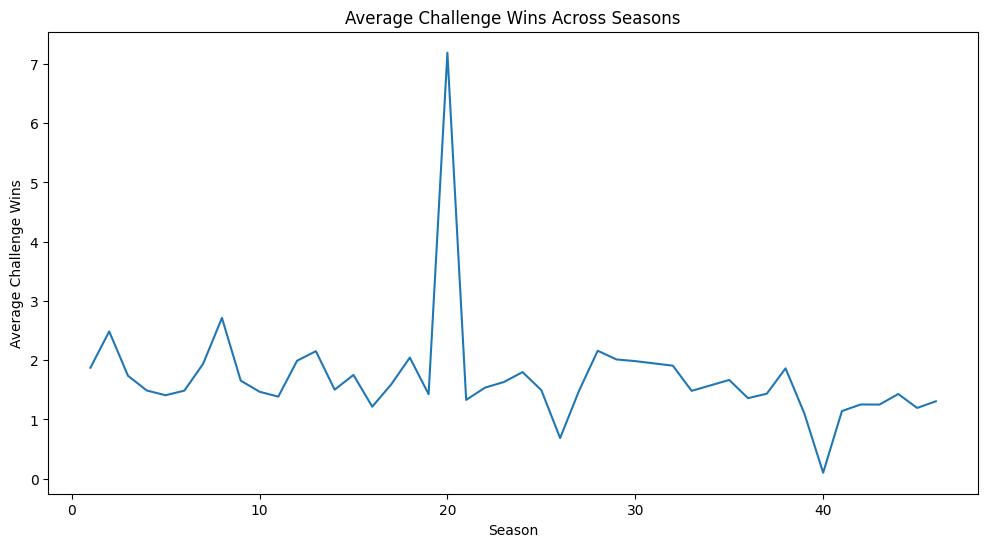

In [59]:
plt.figure(figsize=(12,6))

season_avg_challenge_wins = sdf.groupby('Season #')['Challenge Wins'].mean().reset_index()

sns.lineplot(x='Season #', y='Challenge Wins', data=season_avg_challenge_wins)

plt.title('Average Challenge Wins Across Seasons')
plt.xlabel('Season')
plt.ylabel('Average Challenge Wins')
plt.show()

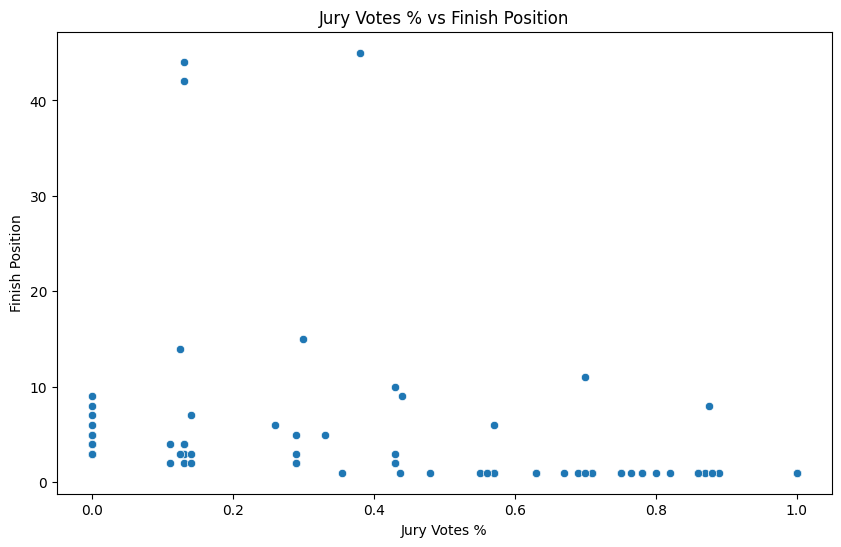

In [60]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='Jury Votes %', y='Finish #', data=sdf)

plt.title('Jury Votes % vs Finish Position')
plt.xlabel('Jury Votes %')
plt.ylabel('Finish Position')
plt.show()

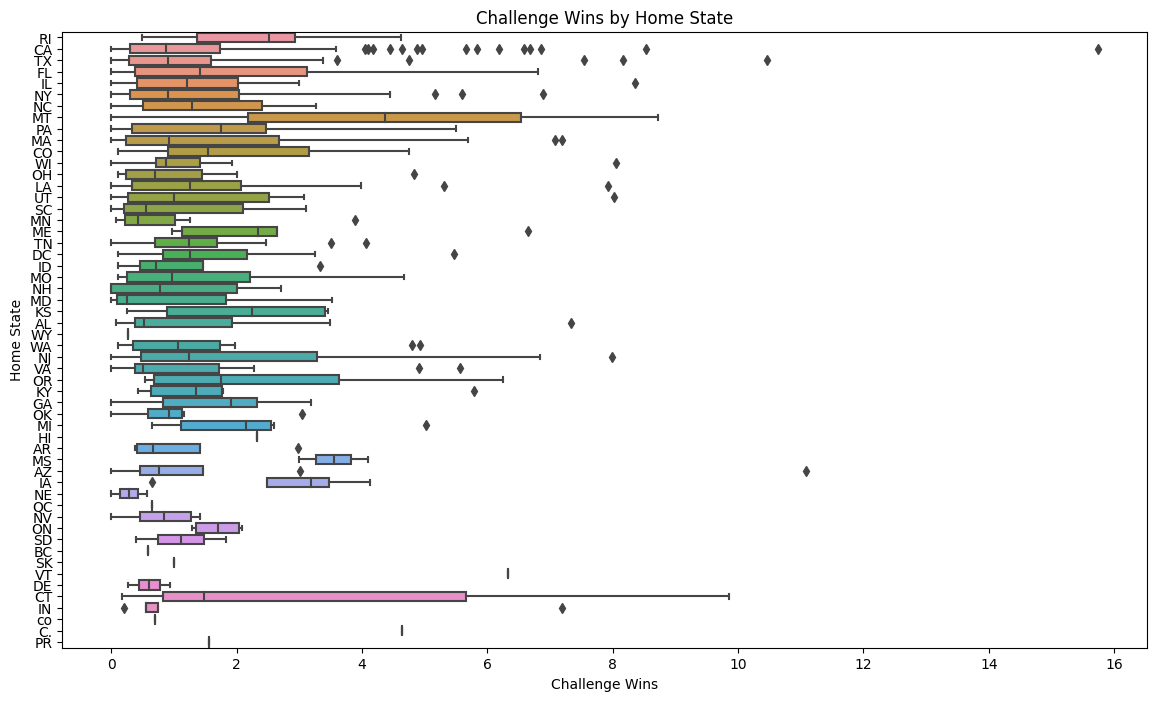

In [61]:
plt.figure(figsize=(14,8))

sns.boxplot(y='Home State', x='Challenge Wins', data=sdf)

plt.title('Challenge Wins by Home State')
plt.xlabel('Challenge Wins')
plt.ylabel('Home State')
plt.show()

In [62]:
top_finishers_no_win = sdf[sdf['Finish #'] > 1].sort_values('Finish #', ascending=True)

top_finishers_no_win[['Full Name', 'Season Title', 'Finish #']].head(10)

,Full Name,Season Title,Finish #
509,Neleh Dennis,Marquesas,2.0
391,Kelly Wiglesworth,Borneo,2.0
573,Russell Hantz,Samoa,2.0
131,Clay Jordan,Thailand,2.0
135,Colby Donaldson,The Australian Outback,2.0
180,Deshawn Radden,41,2.0
399,Kim Johnson,Africa,2.0
251,Ian Rosenberger,Palau,2.0
540,Rafe Judkins,Guatemala,2.0
459,Matthew von Ertfelda,The Amazon,2.0


C:\Users\dougl\AppData\Local\Temp\ipykernel_32304\2925980769.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Season #', y='Jury Votes %', data=jury_vote_data, ci=None)
C:\Users\dougl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dougl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


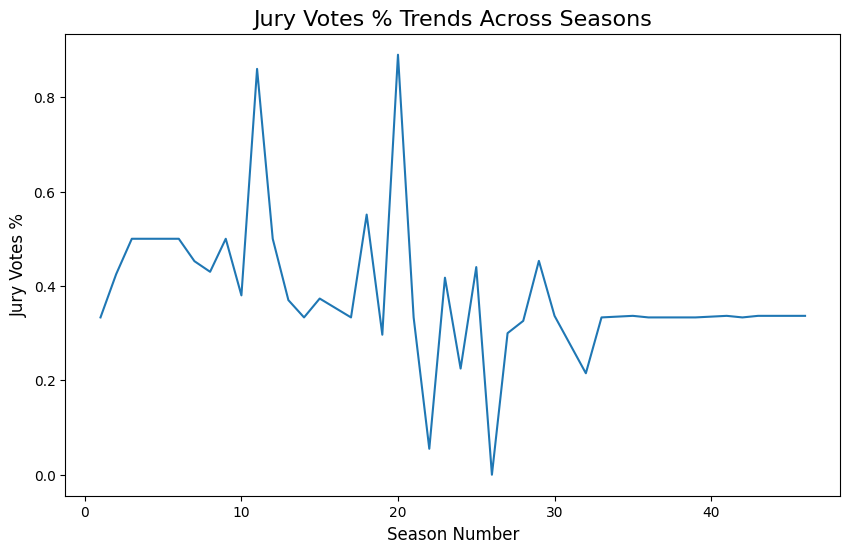

In [65]:
jury_vote_data = sdf[sdf['Jury Votes %'].notnull()]


plt.figure(figsize=(10,6))
sns.lineplot(x='Season #', y='Jury Votes %', data=jury_vote_data, ci=None)

plt.title('Jury Votes % Trends Across Seasons', fontsize=16)
plt.xlabel('Season Number', fontsize=12)
plt.ylabel('Jury Votes %', fontsize=12)

plt.show()

C:\Users\dougl\AppData\Local\Temp\ipykernel_32304\1303328364.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sdf[sdf['Finish #'] == 1]['Jury Votes %'], label='Winners', shade=True)
C:\Users\dougl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dougl\AppData\Local\Temp\ipykernel_32304\1303328364.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sdf[sdf['Finish #'] != 1]['Jury Votes %'], label='Non-Winners', shade=True)
C:\Users\dougl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

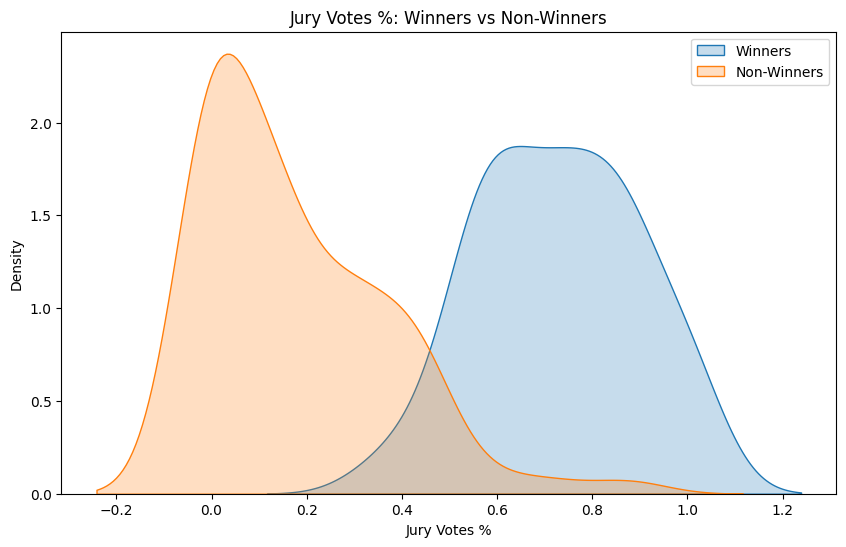

In [66]:
plt.figure(figsize=(10,6))

sns.kdeplot(sdf[sdf['Finish #'] == 1]['Jury Votes %'], label='Winners', shade=True)
sns.kdeplot(sdf[sdf['Finish #'] != 1]['Jury Votes %'], label='Non-Winners', shade=True)

plt.title('Jury Votes %: Winners vs Non-Winners')
plt.xlabel('Jury Votes %')
plt.ylabel('Density')
plt.legend()
plt.show()

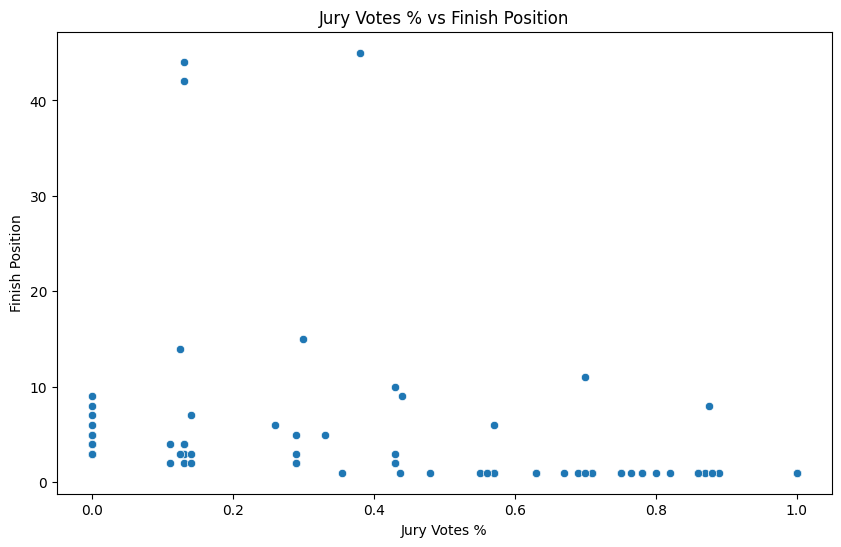

In [67]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='Jury Votes %', y='Finish #', data=sdf)

plt.title('Jury Votes % vs Finish Position')
plt.xlabel('Jury Votes %')
plt.ylabel('Finish Position')
plt.show()